In [1]:
# importing libraries

import numpy as np
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import time

Populating the interactive namespace from numpy and matplotlib


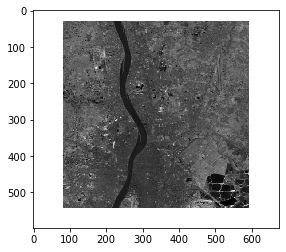

In [2]:
# displaying input images

img=mpimg.imread('4.jpg')
imgplot = plt.imshow(img)
plt.show()

In [3]:
#loading images for R, G, B and I

im = Image.open('4.jpg')

pix = im.load()

In [4]:
# utility function for plotting multiple images

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image for k = %d' % i for i in range(2, 6)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [5]:
# creating feature vector from 4 images

feature_vec = []

for i in range(83, 595) : # 512 rows
    for j in range(30, 542) : # 512 cols
        
        feature_vec.append([pix[i, j][0]])
        
feature_vec = np.array(feature_vec)
print(feature_vec)
print(feature_vec.shape)

num_points, num_feature = feature_vec.shape

[[108]
 [122]
 [111]
 ...
 [255]
 [255]
 [237]]
(262144, 1)


In [6]:
print(num_points)

262144


In [7]:
# selecting k colours

color = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 0, 0), (255, 255, 255)]

In [8]:
# initializing vector for final cluster values

final_clus = np.zeros((num_points, 1))
print(final_clus)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


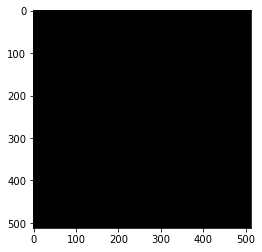

In [9]:
# creating blank image for final output

km = Image.new('RGB', (512, 512))
km.save('blank.png')
pix_km = km.load()

plt.imshow(km)
plt.show()

In [10]:
def choose_k_random_points(k) :
    
    # taking random k points
    clus = []

    for i in range(k) :
        clus.append(feature_vec[random.randint(0, num_points - 1)])

    clus = np.array(clus)
    print(clus)
    return clus

In [11]:
def population_clus(k) :
    # creating array for number of points in each cluster

    clus_pop = np.zeros((k, 1))
    print(clus_pop)
    return clus_pop

In [12]:
# function for euclidean distance

def euclidean_dist(a, b) :
    a = a.reshape((a.shape[0], 1))
    b = b.reshape((b.shape[0], 1))
    dist = a - b
    sq_dist = np.dot(np.transpose(dist), dist)
    sq_dist = np.sqrt(sq_dist)
    return sq_dist

In [13]:
def final_cluster(k, clus, clus_pop) :
    # running clustering algo
       
    sum_clus = np.zeros((k, 1))    
    for i in range(10) :    
        dist = np.absolute(feature_vec - clus.T)
        min_idx = np.argmin(dist, axis = 1)
        min_idx = np.reshape(min_idx, (num_points,1))
        freq = np.zeros((k, 1))
        
        for j in range(num_points) :
            idx = min_idx[j]
            sum_clus[idx] = sum_clus[idx] + feature_vec[j]
            if i > 0 :
                idx_prev = min_idx_prev[j]
                sum_clus[idx_prev] = sum_clus[idx_prev] - feature_vec[j]
            freq[idx] += 1
        clus = np.divide(sum_clus, freq)  
        min_idx_prev = min_idx
        freq_prev = freq
    
    final_clus = min_idx
    print(final_clus)
    return final_clus

In [14]:
def frequency_clusters(final_clus) :
    unique_elements, counts_elements = np.unique(final_clus, return_counts=True)
    print(unique_elements)
    print(counts_elements)

In [15]:
def k_means_clustering(k) :
    
    # choosing k random initial points
    clus = choose_k_random_points(k)
    print(clus.shape)
    
    # getting initial population
    clus_pop = population_clus(k)
    
    # getting final clusters
    final_clus = final_cluster(k, clus, clus_pop)
    
    # frequency of each cluster
    frequency_clusters(final_clus)
    
    c = 0
    for i in range(512) :
        for j in range(512) :
            pix_km[i,j] =  color[int(final_clus[c][0])]
            c = c + 1

    final_file = 'output' + str(k) + '.png' 
    km.save(final_file)

Time taken to run the below cell will be around 3 minutes

In [16]:
start=time.time()

In [17]:
k_means_clustering(2)

[[102]
 [ 98]]
(2, 1)
[[0.]
 [0.]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[0 1]
[120600 141544]


In [18]:
k_means_clustering(3)

[[ 51]
 [120]
 [112]]
(3, 1)
[[0.]
 [0.]
 [0.]]
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
[0 1 2]
[ 86695  42588 132861]


In [19]:
k_means_clustering(4)

[[108]
 [ 89]
 [ 95]
 [ 65]]
(4, 1)
[[0.]
 [0.]
 [0.]
 [0.]]
[[2]
 [0]
 [2]
 ...
 [0]
 [0]
 [0]]
[0 1 2 3]
[ 13430 118132  85245  45337]


In [20]:
k_means_clustering(5)

[[90]
 [84]
 [89]
 [28]
 [63]]
(5, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[2]
 [0]
 [2]
 ...
 [0]
 [0]
 [0]]
[0 1 2 3 4]
[17128 89132 73332 18235 64317]


In [21]:
end = time.time()

In [22]:
print("Total time taken 'in seconds' = ", end - start)

Total time taken 'in seconds' =  249.4968385696411


In [23]:
images = []

img = cv2.imread('output2.png')
images.append(img)

img = cv2.imread('output3.png')
images.append(img)

img = cv2.imread('output4.png')
images.append(img)

img = cv2.imread('output5.png')
images.append(img)

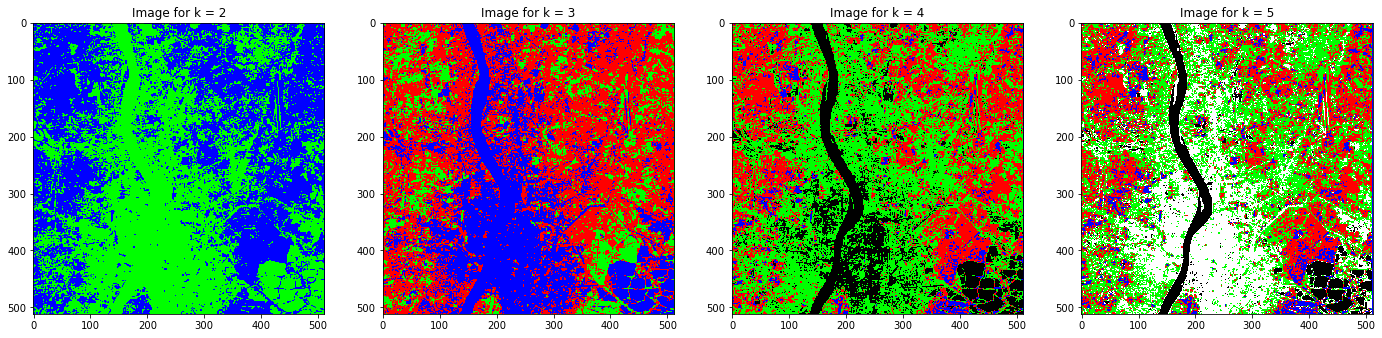

In [24]:
show_images(images)